In [1]:
import os
import math
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import preprocessing

In [2]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
pat_num = 9

In [3]:
mar9 = preprocessing.load_mar_data(data_dir, pat_num)
sickbay9 = preprocessing.load_sickbay_data(data_dir, pat_num)
accel9 = preprocessing.load_accel_data(data_dir, pat_num)
ecg9 = preprocessing.load_ecg_data(data_dir, pat_num)

In [4]:
print(mar9.head())
print(mar9.tail())

                 time  dose       mar_action  \
0 2024-01-11 01:48:00  60.0      ['New Bag']   
1 2024-01-11 02:00:00  60.0  ['Rate Verify']   
2 2024-01-11 03:00:00  60.0  ['Rate Verify']   
3 2024-01-11 03:19:00  80.0      ['New Bag']   
4 2024-01-11 04:00:00  60.0  ['Rate Verify']   

                                            med_name  
0  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
1  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
2  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
3  ['SULFAMETHOXAZOLE-TRIMETHOPRIM IV 0.8 MG/ML (...  
4  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
                    time   dose mar_action  \
2545 2024-02-07 08:19:00    1.0  ['Given']   
2546 2024-02-07 08:19:00  400.0  ['Given']   
2547 2024-02-07 08:20:00   10.0  ['Given']   
2548 2024-02-07 08:20:00  176.0  ['Given']   
2549 2024-02-07 09:40:00   17.0  ['Given']   

                                               med_name  
2545      ['DEXAMETHASONE 1 MG/ML DROPS (CONCE

In [5]:
print(sickbay9.head())
print(sickbay9.tail())

                 time  heart_rate  SpO2  respiratory_rate  \
0 2024-01-15 13:00:00        92.0  98.0              22.0   
1 2024-01-15 13:00:02        91.0  98.0              22.0   
2 2024-01-15 13:00:04        91.0  98.0              22.0   
3 2024-01-15 13:00:06        90.0  98.0              22.0   
4 2024-01-15 13:00:08        90.0  98.0              22.0   

   blood_pressure_systolic  blood_pressure_mean  blood_pressure_diastolic  
0                    114.0                 79.0                      56.0  
1                    114.0                 79.0                      56.0  
2                    114.0                 79.0                      56.0  
3                    114.0                 79.0                      56.0  
4                    114.0                 79.0                      56.0  
                      time  heart_rate  SpO2  respiratory_rate  \
389774 2024-01-24 15:36:34        86.0  96.0              17.0   
389775 2024-01-24 15:36:36        86.0  96.0 

In [7]:
print(accel9.head())
print(accel9.tail())

                  time         a
0  2024-01-15 12:20:00  1.011547
1  2024-01-15 12:20:01  1.011278
2  2024-01-15 12:20:02  1.010954
3  2024-01-15 12:20:03  1.010739
4  2024-01-15 12:20:04  1.010583
                       time         a
191176  2024-01-17 17:26:47  1.038303
191177  2024-01-17 17:26:48  1.040407
191178  2024-01-17 17:26:49  1.038118
191179  2024-01-17 17:26:50  1.027976
191180  2024-01-17 17:26:51  1.056479


In [8]:
print(ecg9.head())
print(ecg9.tail())

   sbs_score          start_time            end_time  \
0          1 2024-01-15 13:22:00 2024-01-15 13:37:00   
1          0 2024-01-15 13:50:00 2024-01-15 14:05:00   
2          1 2024-01-15 14:40:00 2024-01-15 14:55:00   
3          1 2024-01-15 15:32:00 2024-01-15 15:47:00   
4          0 2024-01-15 15:50:00 2024-01-15 16:05:00   

                                                ecg1  \
0  [[0.0102, 0.0306, 0.0408, 0.0408, 0.0306, 0.02...   
1  [[0.01785, 0.0204, 0.02295, 0.0255, 0.02805, 0...   
2  [[0.0, 0.0, -0.00255, -0.0051, -0.0051, -0.005...   
3  [[-0.02805, -0.02805, -0.02805, -0.02805, -0.0...   
4  [[0.01785, 0.0357, 0.0306, 0.01785, 0.00765, 0...   

                                                ecg2  \
0  [[0.0102, 0.03315, 0.0663, 0.0918, 0.0969, 0.0...   
1  [[0.04845, 0.04845, 0.051, 0.05355, 0.05865, 0...   
2  [[-0.00765, -0.00765, -0.0051, -0.0051, -0.005...   
3  [[-0.02805, -0.02805, -0.0306, -0.0306, -0.030...   
4  [[0.02295, 0.03315, 0.0306, 0.0204, 0.00765

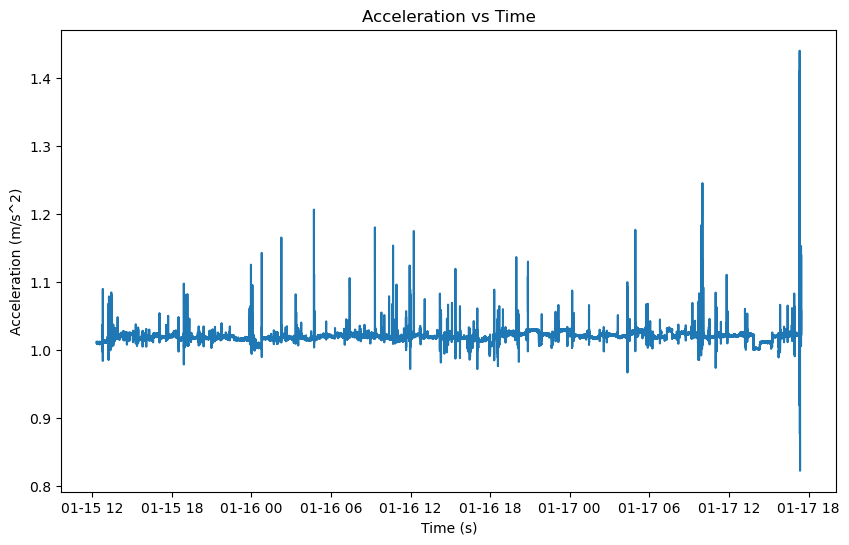

In [13]:
accel9_sample = accel9

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample['time'], accel9_sample['a'])
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

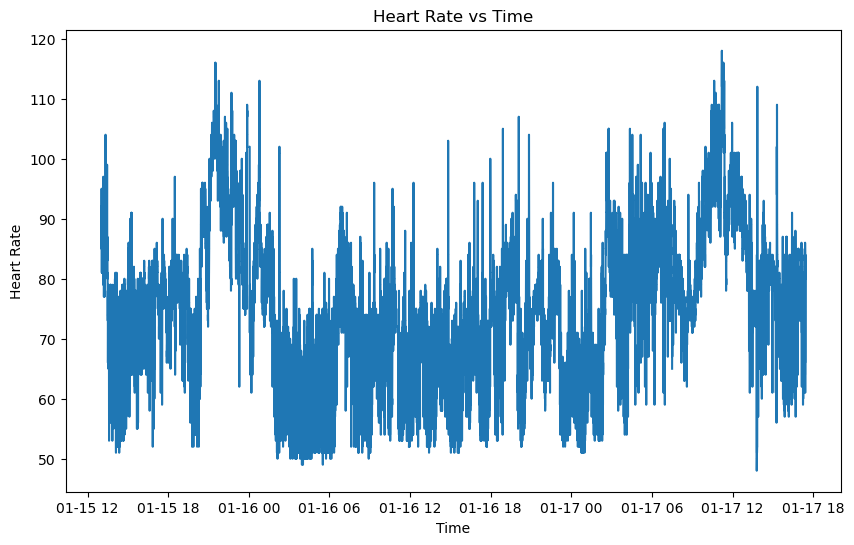

In [19]:
heart_rate_sample = sickbay9[['time', 'heart_rate']]

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

heart_rate_sample = heart_rate_sample[(heart_rate_sample['time'] >= start) & (heart_rate_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(heart_rate_sample['time'], heart_rate_sample['heart_rate'])
plt.title('Heart Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.show()

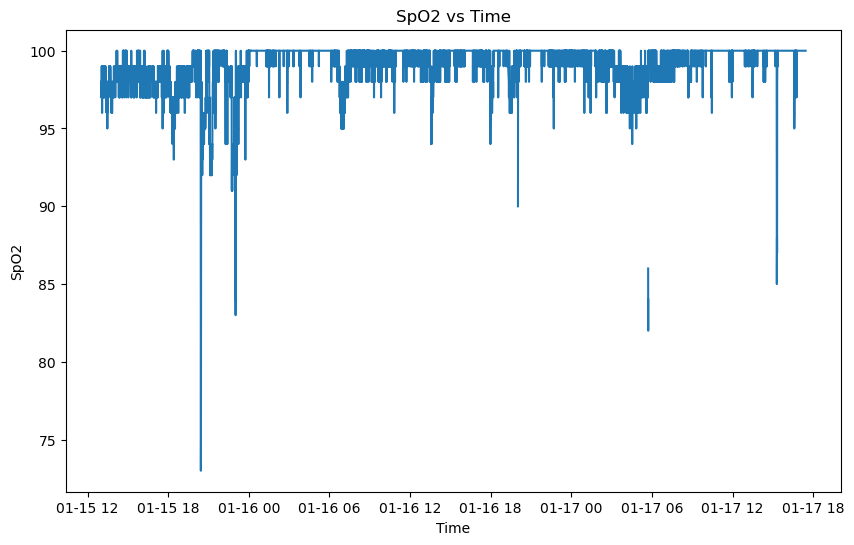

In [25]:
SpO2_sample = sickbay9[['time', 'SpO2']]

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

SpO2_sample = SpO2_sample[(SpO2_sample['time'] >= start) & (SpO2_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(SpO2_sample['time'], SpO2_sample['SpO2'])
plt.title('SpO2 vs Time')
plt.xlabel('Time')
plt.ylabel('SpO2')
plt.show()

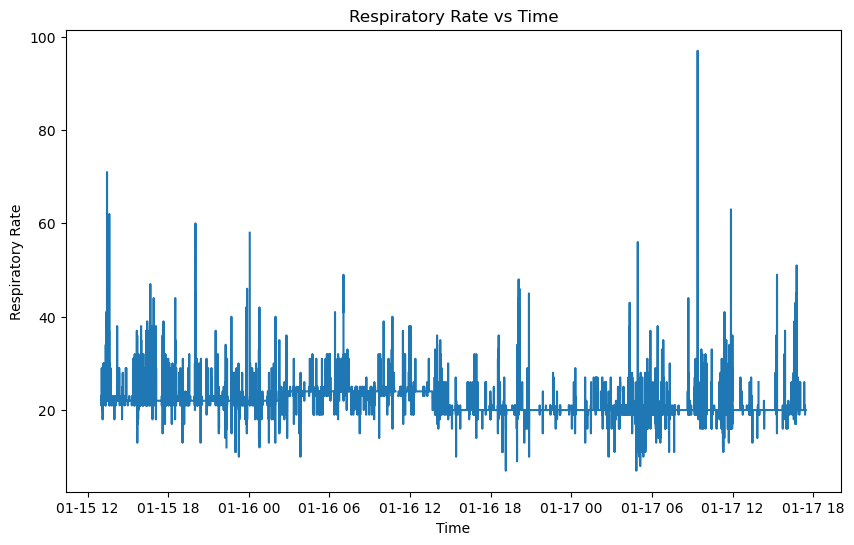

In [23]:
respiratory_rate_sample = sickbay9[['time', 'respiratory_rate']]

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

respiratory_rate_sample = respiratory_rate_sample[(respiratory_rate_sample['time'] >= start) & (respiratory_rate_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(respiratory_rate_sample['time'], respiratory_rate_sample['respiratory_rate'])
plt.title('Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Respiratory Rate')
plt.show()

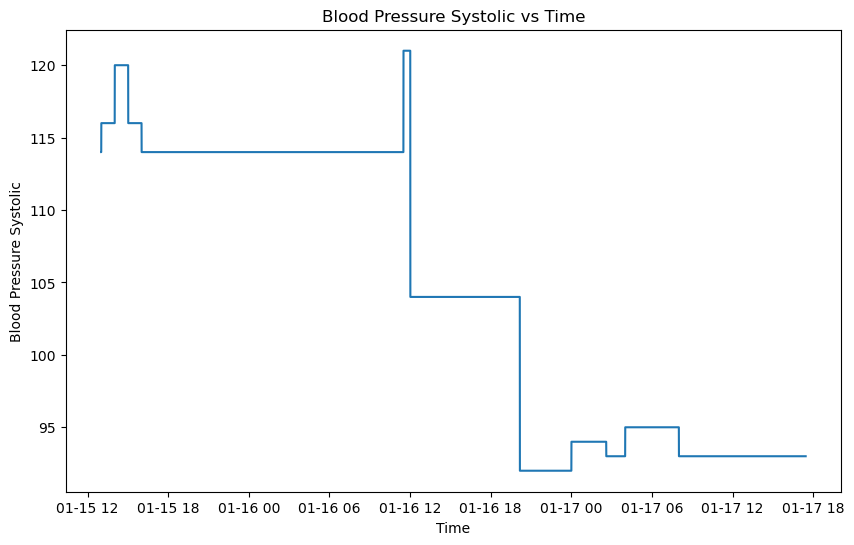

In [26]:
blood_pressure_systolic_sample = sickbay9[['time', 'blood_pressure_systolic']]

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

blood_pressure_systolic_sample = blood_pressure_systolic_sample[(blood_pressure_systolic_sample['time'] >= start) & (blood_pressure_systolic_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_systolic_sample['time'], blood_pressure_systolic_sample['blood_pressure_systolic'])
plt.title('Blood Pressure Systolic vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Systolic')
plt.show()

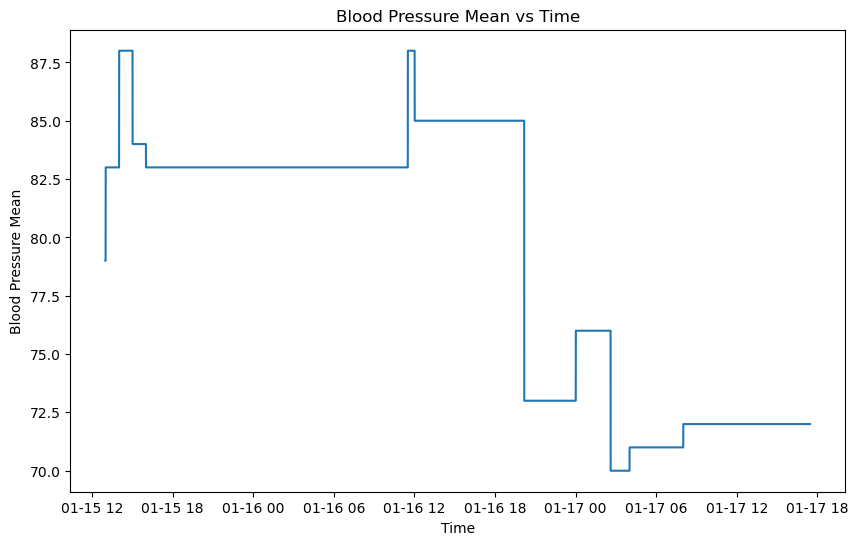

In [27]:
blood_pressure_mean_sample = sickbay9[['time', 'blood_pressure_mean']]

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

blood_pressure_mean_sample = blood_pressure_mean_sample[(blood_pressure_mean_sample['time'] >= start) & (blood_pressure_mean_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_mean_sample['time'], blood_pressure_mean_sample['blood_pressure_mean'])
plt.title('Blood Pressure Mean vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Mean')
plt.show()

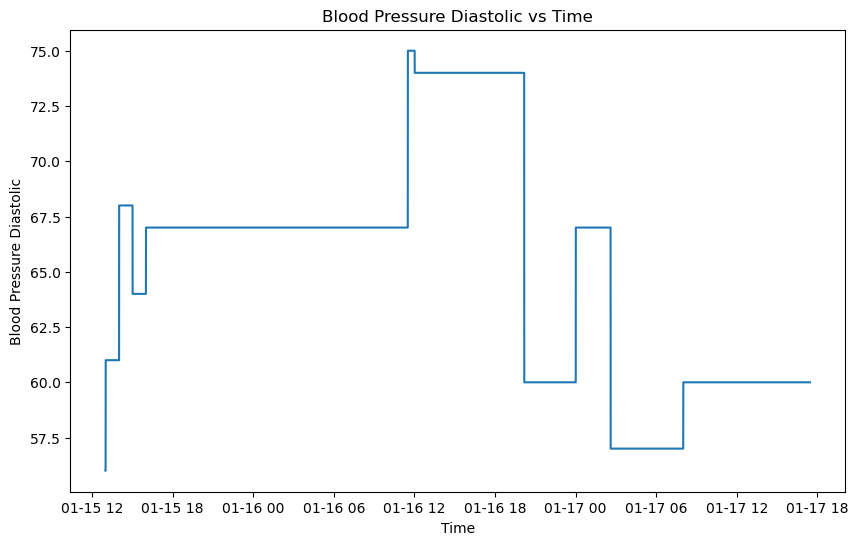

In [28]:
blood_pressure_diastolic_sample = sickbay9[['time', 'blood_pressure_diastolic']]

start = accel9['time'].iloc[0]
end = accel9['time'].iloc[-1]

blood_pressure_diastolic_sample = blood_pressure_diastolic_sample[(blood_pressure_diastolic_sample['time'] >= start) & (blood_pressure_diastolic_sample['time'] <= end)]

plt.figure(figsize=(10, 6))
plt.plot(blood_pressure_diastolic_sample['time'], blood_pressure_diastolic_sample['blood_pressure_diastolic'])
plt.title('Blood Pressure Diastolic vs Time')
plt.xlabel('Time')
plt.ylabel('Blood Pressure Diastolic')
plt.show()

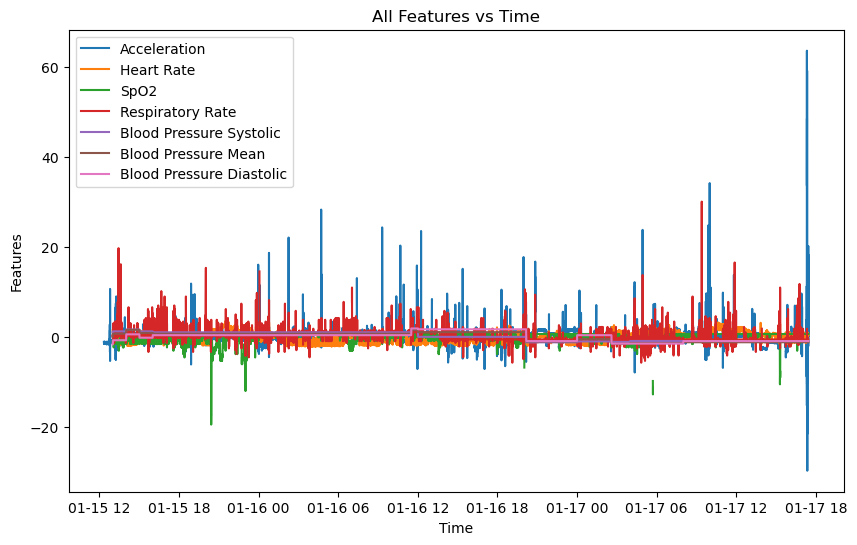

In [41]:
accel9_sample_standardized = accel9_sample.copy()
accel9_sample_standardized['a'] = (accel9_sample['a'] - accel9_sample['a'].mean()) / accel9_sample['a'].std()
heart_rate_sample_standardized = heart_rate_sample.copy()
heart_rate_sample_standardized['heart_rate'] = (heart_rate_sample['heart_rate'] - heart_rate_sample['heart_rate'].mean()) / heart_rate_sample['heart_rate'].std()
SpO2_sample_standardized = SpO2_sample.copy()
SpO2_sample_standardized['SpO2'] = (SpO2_sample['SpO2'] - SpO2_sample['SpO2'].mean()) / SpO2_sample['SpO2'].std()
respiratory_rate_sample_standardized = respiratory_rate_sample.copy()
respiratory_rate_sample_standardized['respiratory_rate'] = (respiratory_rate_sample['respiratory_rate'] - respiratory_rate_sample['respiratory_rate'].mean()) / respiratory_rate_sample['respiratory_rate'].std()
blood_pressure_systolic_sample_standardized = blood_pressure_systolic_sample.copy()
blood_pressure_systolic_sample_standardized['blood_pressure_systolic'] = (blood_pressure_systolic_sample['blood_pressure_systolic'] - blood_pressure_systolic_sample['blood_pressure_systolic'].mean()) / blood_pressure_systolic_sample['blood_pressure_systolic'].std()
blood_pressure_mean_sample_standardized = blood_pressure_mean_sample.copy()
blood_pressure_mean_sample_standardized['blood_pressure_mean'] = (blood_pressure_mean_sample['blood_pressure_mean'] - blood_pressure_mean_sample['blood_pressure_mean'].mean()) / blood_pressure_mean_sample['blood_pressure_mean'].std()
blood_pressure_diastolic_sample_standardized = blood_pressure_diastolic_sample.copy()
blood_pressure_diastolic_sample_standardized['blood_pressure_diastolic'] = (blood_pressure_diastolic_sample['blood_pressure_diastolic'] - blood_pressure_diastolic_sample['blood_pressure_diastolic'].mean()) / blood_pressure_diastolic_sample['blood_pressure_diastolic'].std()

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(SpO2_sample_standardized['time'], SpO2_sample_standardized['SpO2'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
plt.plot(blood_pressure_systolic_sample_standardized['time'], blood_pressure_systolic_sample_standardized['blood_pressure_systolic'])
plt.plot(blood_pressure_mean_sample_standardized['time'], blood_pressure_mean_sample_standardized['blood_pressure_mean'])
plt.plot(blood_pressure_diastolic_sample_standardized['time'], blood_pressure_diastolic_sample_standardized['blood_pressure_diastolic'])
plt.legend(['Acceleration', 'Heart Rate', 'SpO2', 'Respiratory Rate', 'Blood Pressure Systolic', 'Blood Pressure Mean', 'Blood Pressure Diastolic'])
plt.title('All Features vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

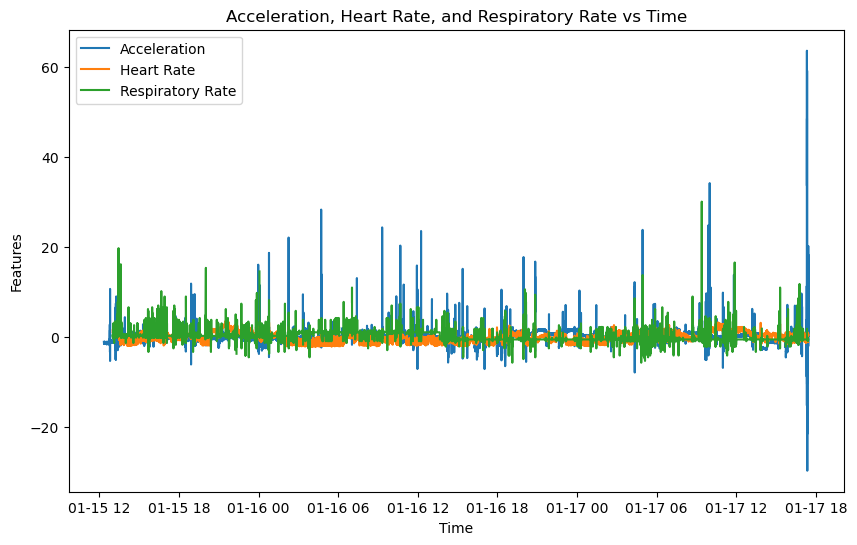

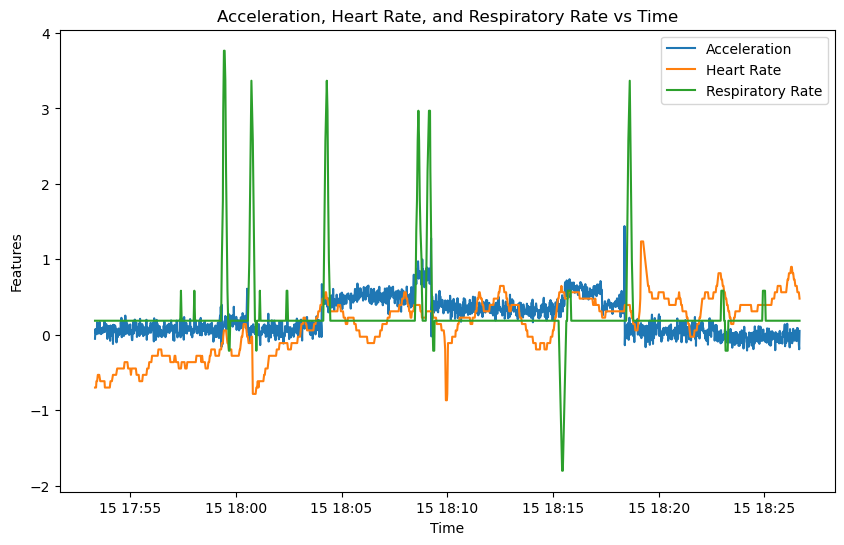

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized['time'], accel9_sample_standardized['a'])
plt.plot(heart_rate_sample_standardized['time'], heart_rate_sample_standardized['heart_rate'])
plt.plot(respiratory_rate_sample_standardized['time'], respiratory_rate_sample_standardized['respiratory_rate'])
plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

start_sample = accel9['time'].iloc[20000]
end_sample = accel9['time'].iloc[22000]

accel9_sample_standardized_sample = accel9_sample_standardized[(accel9_sample_standardized['time'] >= start_sample) & (accel9_sample_standardized['time'] <= end_sample)]
heart_rate_sample_standardized_sample = heart_rate_sample_standardized[(heart_rate_sample_standardized['time'] >= start_sample) & (heart_rate_sample_standardized['time'] <= end_sample)]
respiratory_rate_sample_standardized_sample = respiratory_rate_sample_standardized[(respiratory_rate_sample_standardized['time'] >= start_sample) & (respiratory_rate_sample_standardized['time'] <= end_sample)]

plt.figure(figsize=(10, 6))
plt.plot(accel9_sample_standardized_sample['time'], accel9_sample_standardized_sample['a'])
plt.plot(heart_rate_sample_standardized_sample['time'], heart_rate_sample_standardized_sample['heart_rate'])
plt.plot(respiratory_rate_sample_standardized_sample['time'], respiratory_rate_sample_standardized_sample['respiratory_rate'])
plt.legend(['Acceleration', 'Heart Rate', 'Respiratory Rate'])
plt.title('Acceleration, Heart Rate, and Respiratory Rate vs Time')
plt.xlabel('Time')
plt.ylabel('Features')
plt.show()

In [51]:
print(mar9.shape)
print(mar9.keys())

print(mar9.head())
print(mar9.tail())

(2550, 4)
Index(['time', 'dose', 'mar_action', 'med_name'], dtype='object')
                 time  dose       mar_action  \
0 2024-01-11 01:48:00  60.0      ['New Bag']   
1 2024-01-11 02:00:00  60.0  ['Rate Verify']   
2 2024-01-11 03:00:00  60.0  ['Rate Verify']   
3 2024-01-11 03:19:00  80.0      ['New Bag']   
4 2024-01-11 04:00:00  60.0  ['Rate Verify']   

                                            med_name  
0  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
1  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
2  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
3  ['SULFAMETHOXAZOLE-TRIMETHOPRIM IV 0.8 MG/ML (...  
4  ['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRA...  
                    time   dose mar_action  \
2545 2024-02-07 08:19:00    1.0  ['Given']   
2546 2024-02-07 08:19:00  400.0  ['Given']   
2547 2024-02-07 08:20:00   10.0  ['Given']   
2548 2024-02-07 08:20:00  176.0  ['Given']   
2549 2024-02-07 09:40:00   17.0  ['Given']   

                            

In [54]:
unique_med_name = mar9['med_name'].unique()
print(len(unique_med_name))
print(unique_med_name)

79
["['DEXTROSE 5 % AND 0.9 % SODIUM CHLORIDE INTRAVENOUS SOLUTION']"
 "['SULFAMETHOXAZOLE-TRIMETHOPRIM IV 0.8 MG/ML (PED)']"
 "['CEFTRIAXONE IV 40 MG/ML (JHH PED)']"
 "['PROPOFOL 10 MG/ML INTRAVENOUS EMULSION']"
 "['SODIUM CHLORIDE 0.9% IV BOLUS']"
 "['LIDOCAINE (PF) 20 MG/ML (2 %) INJECTION SOLUTION']"
 "['ROCURONIUM 10 MG/ML INTRAVENOUS SOLUTION']"
 "['FUROSEMIDE 10 MG/ML INJECTION SOLUTION (JHH SYRINGE)']"
 "['ALBUMIN, HUMAN 25 % INTRAVENOUS SOLUTION']"
 "['PROPOFOL INFUSION 10 MG/ML (JHH PED)']"
 "['ALBUMIN, HUMAN 5 % INTRAVENOUS SOLUTION']"
 "['GADOBUTROL 10 MMOL/10 ML (1 MMOL/ML) INTRAVENOUS SOLUTION']"
 "['IOHEXOL 350 MG IODINE/ML INTRAVENOUS SOLUTION']"
 "['SODIUM CHLORIDE 3 % HYPERTONIC INTRAVENOUS INJECTION SOLUTION']"
 "['SODIUM CHLORIDE 3 % HYPERTONIC INTRAVENOUS BOLUS']"
 "['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']"
 "['FENTANYL INFUSION 50 MCG/ML (JHH PED)']"
 "['DEXMEDETOMIDINE INFUSION 4 MCG/ML (JHH PED)']"
 "['FENTANYL 4 MCG/ML IV DILUTION']"
 "['FENTANYL BOLUS FRO

In [ ]:
agents = ['propofol', 'dexmedetomidine', 'midazolam', 'ketamine', 'diazepam', 'lidocaine', 'clonidine', 'hydroxyzine', 'diphenhydramine', 'fentanyl', 'hydromorphone', 'morphine', 'methadone', 'nalbuphine', 'acetaminophen']
pattern = '|'.join(agents)
filtered_mar9 = mar9[mar9['med_name'].str.lower().str.contains(pattern, regex=True)]

print(filtered_mar9.shape)
print(filtered_mar9.keys())
print(filtered_mar9.head())
print(filtered_mar9.tail())

                  time  dose  mar_action  \
12 2024-01-11 09:00:00  79.0  ['Missed']   
19 2024-01-11 13:30:00   NaN     ['Due']   
20 2024-01-11 13:30:00   NaN     ['Due']   
47 2024-01-12 13:00:00   NaN     ['Due']   
63 2024-01-12 19:00:00   9.9   ['Given']   

                                             med_name  
12         ['PROPOFOL 10 MG/ML INTRAVENOUS EMULSION']  
19         ['PROPOFOL 10 MG/ML INTRAVENOUS EMULSION']  
20  ['LIDOCAINE (PF) 20 MG/ML (2 %) INJECTION SOLU...  
47           ['PROPOFOL INFUSION 10 MG/ML (JHH PED)']  
63      ['DEXMEDETOMIDINE BOLUS FROM BAG (JHH PEDS)']  
                    time  dose mar_action  \
2428 2024-01-30 20:01:00   0.8  ['Given']   
2441 2024-01-31 09:24:00   0.8  ['Given']   
2446 2024-01-31 20:08:00   0.8  ['Given']   
2466 2024-02-01 20:24:00   0.8  ['Given']   
2542 2024-02-07 08:19:00   5.0  ['Given']   

                                          med_name  
2428  ['METHADONE 5 MG/5 ML ORAL SOLUTION (UBER)']  
2441  ['METHADONE 5 MG